<a href="https://colab.research.google.com/github/Hong-Jung1227/Machine-learning-hong/blob/main/%EC%9C%84%EC%84%B1%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%95%99%EC%8A%B5_Land_use_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/datalab/drive")
import sys, os
sys.path.append(os.pardir)
sys.path.append("/datalab/drive/MyDrive/원격탐사_도시데이터")
my_path = "/datalab/drive/MyDrive/원격탐사_도시데이터/"

import numpy as np
import matplotlib.pyplot as plt

Mounted at /datalab/drive


In [ ]:
N=512
M=512 # image size
B=4   # band number

with open (my_path + "Sentinel_Segmentation/" + "fgt_list", "r") as myfile:
    anot_q1=myfile.readlines()
with open (my_path + "Sentinel_Segmentation/" + "img_list", "r") as myfile:
    img_q1=myfile.readlines()



In [ ]:
dataFrame_orig = np.zeros((len(img_q1),N,M,B),'float32')
labelFrame_orig = np.zeros((len(img_q1),N,M),'float32')
for i in range(len(img_q1)):
    labelFrame_orig[i] = plt.imread(my_path + "Sentinel_Segmentation/" +'FGT_TIF/' + anot_q1[i][:23])
    dataFrame_orig[i]  = plt.imread(my_path + "Sentinel_Segmentation/" +'IMAGE/'   + img_q1[i][:19])    


In [ ]:
# 레이블 자료
labelFrame_orig[labelFrame_orig==10]=4 # 건물
labelFrame_orig[labelFrame_orig==30]=1 # 도로
labelFrame_orig[labelFrame_orig==50]=2 # 논
labelFrame_orig[labelFrame_orig==60]=2 # 밭
labelFrame_orig[labelFrame_orig==70]=3 # 숲
labelFrame_orig[labelFrame_orig==100]=0 # background class


In [ ]:
train_ratio=0.8

for i in range(dataFrame_orig.shape[0]):
    for b in range(4):
        _max = np.max(dataFrame_orig[i,:,:,b])
        _min = np.min(dataFrame_orig[i,:,:,b])

        dataFrame_orig[i,:,:,b] = (dataFrame_orig[i,:,:,b]-_min)/(_max-_min)

nTrain = int(labelFrame_orig.shape[0]*train_ratio)
nTest  = labelFrame_orig.shape[0] - nTrain

x_train = dataFrame_orig[:nTrain].astype('float32')
t_train = labelFrame_orig[:nTrain].astype('float32')

x_test = dataFrame_orig[nTrain:].astype('float32')
t_test = labelFrame_orig[nTrain:].astype('float32')

# data stacking
x_train = np.vstack([x_train,x_train])
t_train = np.vstack([t_train,t_train])
x_test  = np.vstack([x_test,x_test])
t_test  = np.vstack([t_test,t_test])
N_train = nTrain*2
N_test  = nTest*2

# Shuffling
vec_train = np.arange(N_train)
vec_test  = np.arange(N_test)
np.random.shuffle(vec_train)
np.random.shuffle(vec_test )
x_train = x_train[vec_train]
t_train = t_train[vec_train]
x_test = x_test[vec_test]
t_test = t_test[vec_test]

# flipping
nn = N_train//3
x_train[:nn] = x_train[:nn,::-1,:,:]
t_train[:nn] = t_train[:nn,::-1,:]
x_train[nn:2*nn] = x_train[nn:2*nn,:,::-1,:]
t_train[nn:2*nn] = t_train[nn:2*nn,:,::-1]

nn = N_test//3
x_test[:nn] = x_test[:nn,::-1,:,:]
t_test[:nn] = t_test[:nn,::-1,:]
x_test[nn:2*nn] = x_test[nn:2*nn,:,::-1,:]
t_test[nn:2*nn] = t_test[nn:2*nn,:,::-1]

# Shuffling
vec_train = np.arange(N_train)
vec_test  = np.arange(N_test)
np.random.shuffle(vec_train)
np.random.shuffle(vec_test )
x_train = x_train[vec_train]
t_train = t_train[vec_train]
x_test = x_test[vec_test]
t_test = t_test[vec_test]

# Rotating
nn = N_train//4
for i in range(3):
    x_train[(i+1)*nn:(i+2)*nn] = np.rot90(x_train[(i)*nn:(i+1)*nn],axes=(1,2))
    t_train[(i+1)*nn:(i+2)*nn] = np.rot90(t_train[(i)*nn:(i+1)*nn],axes=(1,2))
    #for j in range((i+1)*nn, (i+2)*nn):
    #    x_train[j] = np.rot90(x_train[j-i*nn],axes=(0,1))
    #    t_train[j] = np.rot90(t_train[j-i*nn],axes=(0,1))

nn = N_test//4
for i in range(3):
    x_test[(i+1)*nn:(i+2)*nn] = np.rot90(x_test[(i)*nn:(i+1)*nn],axes=(1,2))
    t_test[(i+1)*nn:(i+2)*nn] = np.rot90(t_test[(i)*nn:(i+1)*nn],axes=(1,2))
    #for j in range((i+1)*nn, (i+2)*nn):
    #    x_train[j] = np.rot90(x_train[j-i*nn],axes=(0,1))
    #    t_train[j] = np.rot90(t_train[j-i*nn],axes=(0,1))

# Shuffling
np.random.shuffle(vec_train)
np.random.shuffle(vec_test )
x_train = x_train[vec_train]
t_train = t_train[vec_train]
x_test = x_test[vec_test]
t_test = t_test[vec_test]

print(f"input data size = {x_train.shape}")
print(f"output data size = {t_train.shape}")


input data size = (480, 512, 512, 4)
output data size = (480, 512, 512)


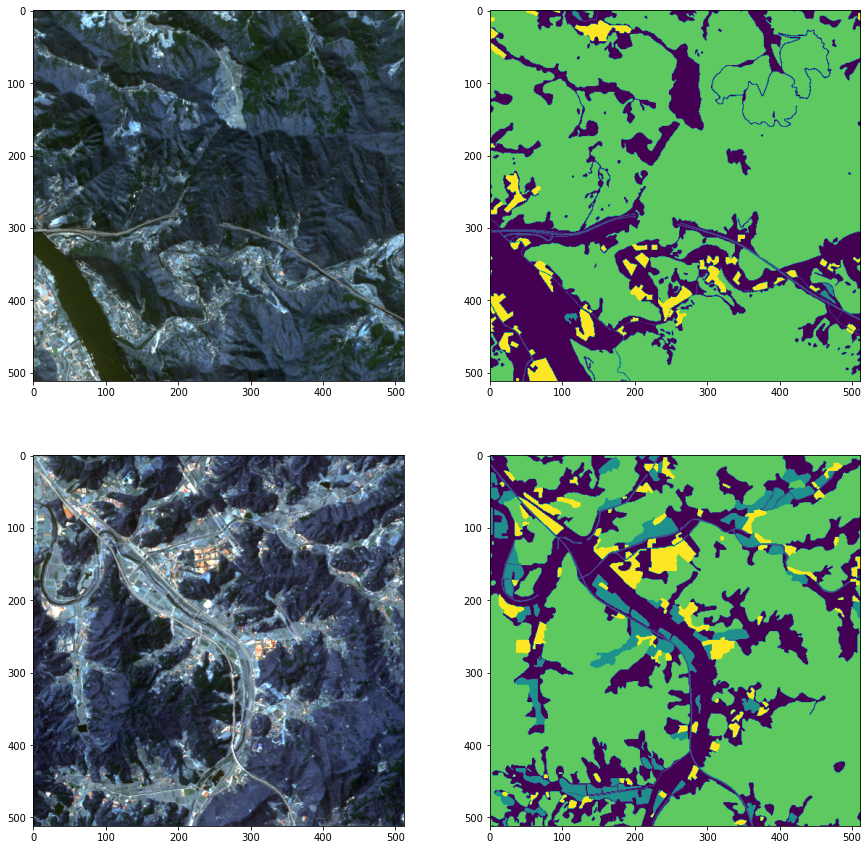

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(x_train[1,:,:,:3])
plt.subplot(2,2,2)
plt.imshow(t_train[1,:,:])
plt.subplot(2,2,3)
plt.imshow(x_train[15,:,:,:3])
plt.subplot(2,2,4)
plt.imshow(t_train[15,:,:])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation, Flatten, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
def Encoder(x, filters=64):
  
  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.3)(x)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.3)(x)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  pool = MaxPooling2D(pool_size=(2,2))(x)

  return x, pool

def Decoder(x, _c = None, filters=64):

  if _c != None:
    x = concatenate([x, _c], axis=-1)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.3)(x)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.3)(x)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = UpSampling2D(size=(2,2))(x)

  return x

def Outblock(x, _c = None, filters=64):

  if _c != None:
    x = concatenate([x, _c], axis=-1)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.3)(x)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.3)(x)

  x = Conv2D(filters, (3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(16,(3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(2,(3,3), kernel_initializer='he_normal',padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation('softmax')(x)

  return x

def UnetSegmentation(input_size=(512,512,4)):

  in1 = Input(shape=input_size)

  inc1,pool1 = Encoder(in1, 64)       # 256, 128
  inc2,pool2 = Encoder(pool1, 128)    # 128, 64
  inc3,pool3 = Encoder(pool2, 256)    # 64, 32
  inc4,pool4 = Encoder(pool3, 512)    # 32, 16

  x = Decoder(pool4,None,1024)        #32
  x = Decoder(x, inc4,512)            #64
  x = Decoder(x, inc3,256)            #128
  x = Decoder(x, inc2,128)            #256
  

  x = Outblock(x,inc1,64)      #256

  model = Model(inputs=[in1], outputs=[x])

  return model

In [ ]:
# 모델컴파일
lr = 0.001
mini_batch = 1
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["gpu:0"])
with mirrored_strategy.scope():
  model = UnetSegmentation()
  model.compile(optimizer=Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
mcp_save = keras.callbacks.ModelCheckpoint(my_path+"cnn_param.h5",save_best_only=True,monitor="val_accuracy",mode="max")

hist = model.fit(x_train,t_train,batch_size=mini_batch,validation_data=(x_test,t_test),epochs=10,callbacks=[mcp_save])

Epoch 1/10
480/480 [==============================] - 239s 452ms/step - loss: nan - accuracy: 0.2764 - val_loss: nan - val_accuracy: 0.1953
Epoch 2/10
480/480 [==============================] - 209s 435ms/step - loss: nan - accuracy: 0.2765 - val_loss: nan - val_accuracy: 0.1953
Epoch 3/10
480/480 [==============================] - 209s 435ms/step - loss: nan - accuracy: 0.2765 - val_loss: nan - val_accuracy: 0.1953
Epoch 4/10
156/480 [========>.....................] - ETA: 2:11 - loss: nan - accuracy: 0.2794

KeyboardInterrupt: ignored

In [ ]:
pred_val=np.zeros_like(t_test)
for i in range(x_test.shape[0]//mini_batch+1):
    pred_val[mini_batch*i:mini_batch*(i+1)]=np.argmax(model.predict(x_test[mini_batch*i:mini_batch*(i+1)]),axis=3)

1/1 [==============================] - 0s 67ms/step


ValueError: ignored